# Python Data Analysis for Particle Physics
Python provides engineers, computer scientist, and physicist tools for data analysis. Packages like Numpy, Pandas and Scipy allows for intelligent and thoughtful data analysis through simple and clear functions. Python is a simple language to learn however, its wide range of tools and packages means that it is difficult to master entirely. Before beginning this tutorial ensure, you understand python basics. (Insert link to basics here)

In this tutorial we will cover packages in detail:
- Scipy
- Git
- Pandas
- Numpy
- Coffea
- Matplotlib
Others may be mentioned, but these will be covered in depth.

## Pandas
Pandas' mission statement is:
___
pandas aims to be the fundamental high-level building block for doing practical, real world data analysis in Python. Additionally, it has the broader goal of becoming the most powerful and flexible open source data analysis / manipulation tool available in any language.
___
   Pandas builds on the concept of python lists and dictionaries, they provide greater control of data and a greater variety of datatypes to manage.

Pandas is a great introduction multi-dimensional data sets. Below, we will create a dataset of a particle moving 2 dimensionally.

In [1]:
#Test if you have installed pandas
#Pandas can be installed via pip(pip install pandas)
import pandas as pd
pd.__version__

'1.0.3'

In [2]:
df = pd.read_csv('2Dmotion.csv')
#The dataset is stored in a dataframe with unique labelled columns and indexes

The dataset comes from a csv, pandas allows for selecting data via rows or columns


In [3]:
#These can be used with different list commands and each column can be treated like a list.
#Via the form df['name'], a column can be isolated
print(df['x'])

0     0.000000
1     2.000000
2     4.000000
3     6.000000
4     8.000000
5    10.000000
6    12.000000
7    14.000000
8    16.000000
9    16.326526
Name: x, dtype: float64


In [4]:
print(len(df['x']))

10


In [5]:
#Select 1 row and print it
print(df.iloc[9]['x'])

16.326526


In [6]:
#filters can be applied to a dataframe without iterating(or explicitly with a for-loop)
df = df[df['x']>10]
#All that is left are rows that are greater than 10, the last 4 rows. 
print(df)

          t          x          y  v_x   v_y
6  6.000000  12.000000  63.600000    2 -18.8
7  7.000000  14.000000  39.900000    2 -28.6
8  8.000000  16.000000   6.400000    2 -38.4
9  8.163263  16.326526   0.000092    2 -40.0


The other way to organize data is via numpy arrays. Via numpy and scipy, data analysis and statistics functions are availible for use.

In [7]:
import numpy as np

In [8]:
#Create an array with 10 values, a list is converted to an array
t_array = np.array([1,3,4,5,2,5,6,7,8,10])
#Numpy gives us access to functions like max, min and sort
print(np.max(t_array))
print(np.min(t_array))
print(np.sort(t_array))

10
1
[ 1  2  3  4  5  5  6  7  8 10]


In [9]:
#Numpy also allows 2D matrice
t_array = np.array([[2 ,5],[6 ,4],[1 ,8]])
print(t_array)
print("Max values of each column")
print(np.max(t_array,axis=0))
print("Max values of each row")
print(np.max(t_array,axis=1))
print("Min values of each column")
print(np.min(t_array,axis=0))
print("Min values of each row")
print(np.min(t_array,axis=1))

[[2 5]
 [6 4]
 [1 8]]
Max values of each column
[6 8]
Max values of each row
[5 6 8]
Min values of each column
[1 4]
Min values of each row
[2 4 1]


## Matplotlib and Seaborn
Now that we have robust datasets and the ability to modify them quickly and easily.

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

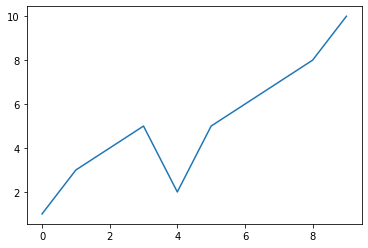

In [11]:
#Create a line plot using the following array
t_array =np.array([1,3,4,5,2,5,6,7,8,10])
plt.plot(t_array)

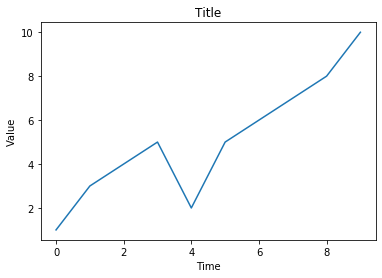

In [12]:
plt.title("Title")
#Add Xlabel
plt.xlabel("Time")
#Add Ylabel
plt.ylabel("Value")
plt.plot(t_array)

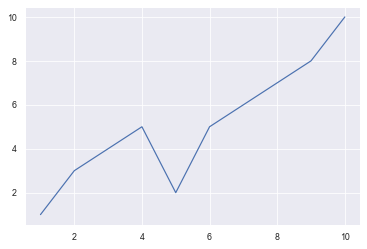

In [13]:
#Seaborn is a package built on matplotlib, it provides greater control and nicer looking plots,
#in order to make a line plot. It takes x and y to make it.
#sns.set() sets the color scheme and background for readability
sns.set('paper')
sns.lineplot([1,2,3,4,5,6,7,8,9,10],t_array)

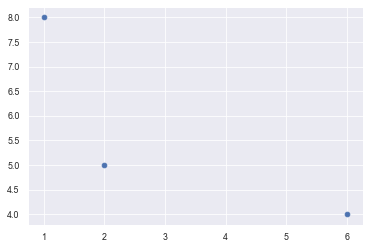

In [14]:
#When dealing with 2D array, one must use the slice arrays in index
#[:,0] refers to the 1st value of each []
t_array = np.array([[2 ,5],[6 ,4],[1 ,8]])
plt.scatter(t_array[:,0],t_array[:,1])

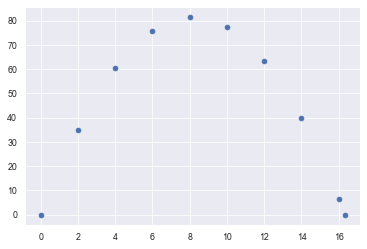

In [15]:
#Returning to our 2Dmotion.csv dataset
#The Scatter function can be used to plot the path of an object
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("2Dmotion.csv")
plt.scatter(df['x'],df['y'])

## Coffea, SciPy and HEP Data
Now that we have a grasp on the basics to large datasets, we will begin using a data type that combines both data arrays and dataframes. These are called JaggedArrays; the extension of this awkward arrays, however these function similarly for our needs. They can hold different types of data and can function along with being called and filtered like a dataframe or an array.

In [16]:
#We will be utilizing the follow dataset from Coffea's documentation.
!curl -O http://scikit-hep.org/uproot/examples/HZZ.root

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  212k  100  212k    0     0   709k      0 --:--:-- --:--:-- --:--:--  709k


In [34]:
import coffea
import scipy
import numpy as np
import uproot
import uproot_methods
import awkward


In [40]:
#Uproot is a package that takes the .root files output from CMS back-end data collection and takes it directly into a python data object
file = uproot.open("HZZ.root")
tree = file["events"]
print(tree)

[[] [-38.874714] [] ... [-3.7148185] [-36.361286 -15.256871] []]


In [19]:
#This dataset is still organized like a root file
#Tree-->Branch--->Data
print(tree.show())
weights = tree.pandas.df(["Event*"])

NJet                       (no streamer)              asdtype('>i4')
Jet_Px                     (no streamer)              asjagged(asdtype('>f4'))
Jet_Py                     (no streamer)              asjagged(asdtype('>f4'))
Jet_Pz                     (no streamer)              asjagged(asdtype('>f4'))
Jet_E                      (no streamer)              asjagged(asdtype('>f4'))
Jet_btag                   (no streamer)              asjagged(asdtype('>f4'))
Jet_ID                     (no streamer)              asjagged(asdtype('bool'))
NMuon                      (no streamer)              asdtype('>i4')
Muon_Px                    (no streamer)              asjagged(asdtype('>f4'))
Muon_Py                    (no streamer)              asjagged(asdtype('>f4'))
Muon_Pz                    (no streamer)              asjagged(asdtype('>f4'))
Muon_E                     (no streamer)              asjagged(asdtype('>f4'))
Muon_Charge                (no streamer)              asjagged(asdtype(

In [20]:
#Reading all of the output, one can read a series of arrays and jagged arrays, each branch corresponds to an array. 
#By taking the same index from each array, these slices can build events.
#If we were interested in only Electron x-dir momention. We can filter only those groups out.
#In HEP data collection, plotting histogram distributions will help us give the data a visual check in order to make cuts
#or decide if the data is normal.
#Flatten = (Condensing array/list of lists/arrays into one array/list)
panda_data=tree.pandas.df(["Electron_P*"], flatten=True)
#Now our data is in a dataframe, we can now do data analysis!

Text(0, 0.5, 'Counts')

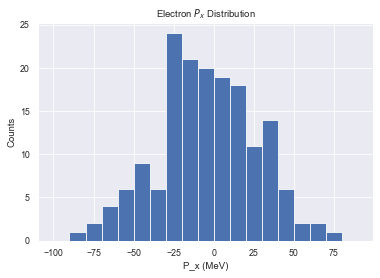

In [21]:
#Coffea has built in Hist functions for us to use:
import coffea.hist as hist
n=0
start = -100
binning=[]
while(n<20):
    binning.append(start+n*10)
    n=n+1
fig=plt.hist(panda_data['Electron_Px'],bins=binning)
plt.title("Electron $P_x$ Distribution")
plt.xlabel("P_x (MeV)")
plt.ylabel("Counts")

Text(0, 0.5, 'Counts')

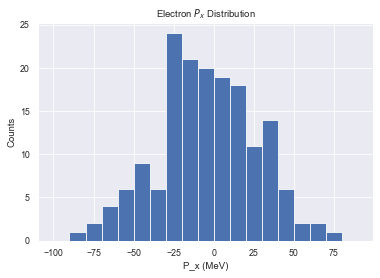

In [22]:
#Utilizing some of our plotting tools we can modify the style.
import seaborn as sns
sns.set_style("darkgrid")
fig=plt.hist(panda_data['Electron_Px'],bins=binning)
plt.title("Electron $P_x$ Distribution")
plt.xlabel("P_x (MeV)")
plt.ylabel("Counts")

The average value is -4.7304454
The standard deviation value is 37.84155211623559


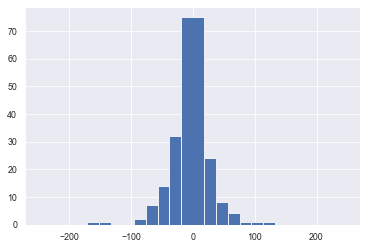

In [23]:
import scipy.stats as sts
#The Binning function below can be used on guassian distribution to create bins
avg = np.average(panda_data['Electron_Px'])
print("The average value is " + str(avg))
std = sts.tstd(panda_data['Electron_Px'])
print("The standard deviation value is "+str(std))
#Now that we have the data, we can create bins.
#By modifying the bin ratio, more bins will be made
#Bin_ratio reflects how many bins one sigma will contain.
def binningfunction(avg,std):
    bins = []
    bpos = []
    bneg = []
    bin_ratio = 2
    val = 0 
    while abs(val) < std*6:
        bneg.append(val-std/bin_ratio)
        bpos.append(abs(val)+std/bin_ratio)
        val=val-std/bin_ratio
    bins = bneg+bpos
    binlist=sorted(bins)
    return binlist
binning = binningfunction(avg,std)
fig=plt.hist(panda_data['Electron_Px'],bins=binning)

## Statistical Tools in Python
To conduct statistical tests, packages like Scipy.Stats can be used. We will test if a guassian distribution is present in the above data (P_x) and then take it's average, and standard deviation. We can use this data to create a binned fit, this will not require a human input on the data and can instead be automatically made.

In [24]:
import seaborn as sns
sns.reset_orig()
import scipy.stats as sts
import matplotlib.pyplot as plt

Text(0.5, 0, 'Electron $P_{x}$')

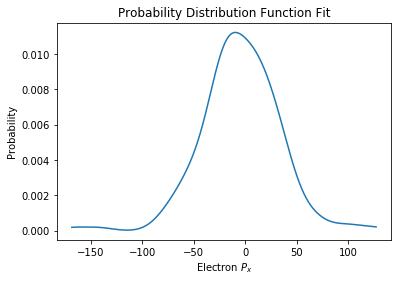

In [25]:
#We can create fits/tests for the data for many purposes:
#1. We can exrapolate trends in multiple datasets without needing the whole datasets
#2. Compare datasets of different sizes
#2a determine if a smaller dataset is apart of a larger set
#2b determine if a smaller dataset observes a similar phenomenom
#3. For HEP, we can make determination on what data is background(should be present in all datasets similarly)
# and "cut" that data out.


#We will be creating an unbinned maximum fit, this can be used for smaller datasets or any case where a binned fit isn't pertinent
#or necessary. Notice above if we modify the bin_ratio, the histogram looks fairly different, so creating an unbinned
#maximum fit will show the highest liklihood values without losing data clarity.


#Scipy stats already has functions for us to use, we will be creating a Probability Distribution Function
#We will treat the data as a Guassian Distribution. In other datasets, it is important to use statistical tests for
#a fit. 
#Utilizing the built-in function guassian_kde, we can create a probability distribution function. KDE stands for kernal density estimation,
#many python packages and methods use KDEs to make PDFs. 
df=panda_data['Electron_Px']
kde= sts.gaussian_kde(df)
ind = np.linspace(df.min(),df.max(),1000)
#The Gaussian_KDE function requires the evaluate function,
line = kde.evaluate(ind)
plt.plot(ind,line)
plt.title("Probability Distribution Function Fit")
plt.ylabel("Probability")
plt.xlabel("Electron $P_{x}$")
#This plot shows the probability over the electron P_x, this is a shaped fit. It is not necessarily the best fit but allows
#for a quick comparison of data to determine if further testing would be worthwhile.
#NOTE: The Sum of the area under the curve adds up to 1. as expected in stats.

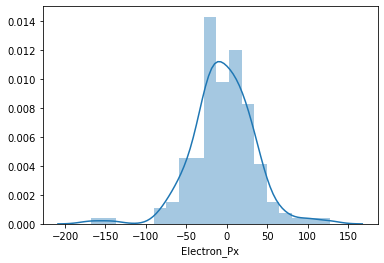

In [26]:
#Using Seaborn, a kde can overlayed on the distplot
ax = sns.distplot(df)
#NOTE: The histogram plot is normalized. Meaning that the sum of the bins will add up to 1. This is a binned fit.
#The histogram shows the likliest bins to find the ElectronP_x

Text(0.5, 1.0, 'Binned Maximum Liklihood Fit')

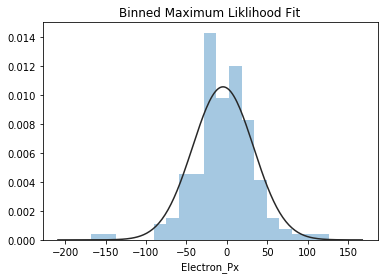

In [27]:
#Lets perform a binned maximum liklihood fit with seaborn and scipy
from scipy.stats import norm
#this will create a maximum likelihood gaussian distribution fit
ax = sns.distplot(df, fit=norm,kde = False)
ax.set_title("Binned Maximum Liklihood Fit")

Text(0.5, 1.0, 'Binned Maximum Liklihood Fit')

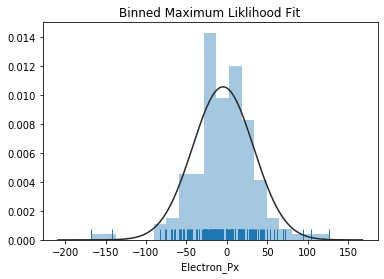

In [28]:
#A rugplot can be overlayed so you can see the general location of data outside of the binning
ax = sns.distplot(df, fit=norm,kde = False,rug=True)
ax.set_title("Binned Maximum Liklihood Fit")

-9367.751998273108
1.0


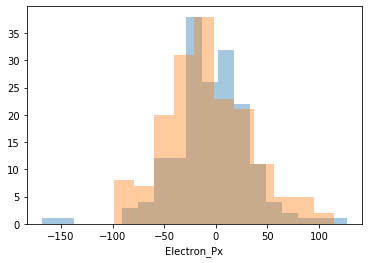

In [29]:
#Now we have been using fits, but we don't know if we are using the right fits, enter the chi-squared test.
#this is a common and effective way to test if a dataset is guassian. Chi-squared testing can tell us if a fit a well sutied for
#the dataset.
#A chi-squared test compares two sets of data, one could be a theoretical guassian distribution, for our dataset above. 
#We found these two valuse of the mu and sigma, so we can create a guassian distribution based on this.
test_data = np.random.normal(avg,std,len(df))
chisq, p = sts.chisquare(test_data,df)
print(chisq)
print(p)
#Normally, your chi-squared value would be smaller, however it is not always helpful
#your p-value being so high is problematic and indicates a failure along the way.
plt =sns.distplot(df,kde = False,)
ax2 = sns.distplot(test_data,kde=False)
#Observing the plot may be decieving, they look fairly similar, however you can observe outliers in the blue(experimental) data
#This may mean we should make data cuts or we should take more data, this data is pretty much single peaked however multiple peaks
#can be observed.

In [31]:
#Observing these values, a guassian distribution is not the best fit for this data, one might conclude we fitted the data wrong
#or made some mistake along the way. If that's what you thought, great job! You're thinking like a scientist. There is no one size fits
#all process for data analisys.
#For this data it may be worthwhile looking at the data holistically, 
#combining the momentum vectors into a single magnitude or 4-vector. 

## COFFEA EXERCISE

After completing these exercises. You should head to coffea's page on github and complete the tutorials there.

https://coffeateam.github.io/coffea/index.html#

The goal of this page was give a taste of data analysis, while focusing on the important aspects of python data and information storage. Coffea's pages talk about uproot, what ROOT is and how we use them to analyze HEP data. If you have questions for the author, email zshelton2015@my.fit.edu

Sources and further reading:

Statistics Fitting
https://indico.cern.ch/category/6015/attachments/192/631/Statistics_Fitting_II.pdf

Coffea Documentation:
https://coffeateam.github.io/

Scipy Documentation:
https://docs.scipy.org/doc/scipy/reference/
